In [9]:
import numpy as np
import os
import random
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

from io import StringIO   

In [10]:
init_algs = [
            # 'BEST',
            'NN',
            'MNN',
            'RNN',
            'MRNN',
            ]
colors = [
            'red',
            'purple',
            'cyan',
            'pink',
            'green',
            'violet',
            'blue',
            'brown',
            'orange',
            'olive',
        ]



In [11]:
n = 100
N = 100
M = 1_000_000
r = 0.01
two_opt_rate = 0
file_name="kroA100"
report_period = 1_000_000
w_opt_tour = False
besth = 21282
readfile = True


In [12]:
if readfile:
  f = open("../data/"+file_name+".tsp", "r")
  cooord = []
  start = False
  for line in f:
    token = line.split()
    if start and token[0] != 'EOF':
      if int(token[0]) > n:
        break
      cooord.append([float(token[1]), float(token[2])])
      # print(cooord[-1])
    elif token[0] == 'NODE_COORD_SECTION' or token[0] == 'DISPLAY_DATA_SECTION':
      start = True
    elif token[0] == 'EOF':
      break
  f.close()
  cooord = np.array(cooord)

In [13]:
def read_tour(file_name):
  best_tour = []
  f = open(file_name,"r")
  start = False
  for line in f:
    token = line.split()
    if start and token[0] != 'EOF'  and token[0] != '-1':
      best_tour.append(token[0])
      if len(best_tour) >= n:
        break
      # print(cooord[-1])
    elif token[0] == 'TOUR_SECTION':
      start = True
  f.close()
  best_tour.append(best_tour[0])
  best_tour = np.array(best_tour).astype(int)-1
  return best_tour

def read_result_ga():
    histories = []
    tours = []
    for alg in init_algs:
        f = open("temp_result/"+alg, "r")
        d = StringIO(f.read())
        e = np.loadtxt(d)
        histories.append(e)
        f.close()
        f = open("temp_result/"+alg+'_tour', "r")
        d = StringIO(f.read())
        e = np.loadtxt(d).astype(int)
        f.close()
        tours.append(e)
    return histories, tours

def plot_histories(histories, colors, w_opt=True):
    num_hist = len(histories)
    x = np.arange(len(histories[0]))*100
    plt.title("n = "+str(n)+", N = "+str(N))
    plt.xlabel("Generation")
    plt.ylabel("Best solution")
    for i in range(num_hist):
        plt.plot(x, histories[i], colors[i], label=init_algs[i])
    if w_opt:
        for i in range(num_hist):
            print(init_algs[i],'error rate =', np.round((histories[i][0]-besth)/besth*100, 3), '- final err rate', np.round((histories[i][-1]-besth)/besth*100, 3), "%")
        plt.axhline(besth, color ="black")
    plt.legend()
    plt.show()

def plot_tour(tour,color, figsize=None):
    if figsize:
        plt.figure(figsize=figsize)
    plt.plot(cooord[tour,0],cooord[tour,1],color=color)
    plt.plot([cooord[tour[-1],0], cooord[tour[0],0]],[cooord[tour[-1],1], cooord[tour[0],1]],color=color)
    plt.scatter(cooord[:,0],cooord[:,1], s=5)
    if w_opt_tour:
        plt.plot(cooord[best_tour,0],cooord[best_tour,1], color='grey', lw=5, alpha=0.3)
    plt.show()


def plot_mtour(mtour,colors):
    for tour, color in zip(mtour, colors):
        plt.plot(cooord[tour,0],cooord[tour,1],color=color)
        plt.plot([cooord[tour[-1],0], cooord[tour[0],0]],[cooord[tour[-1],1], cooord[tour[0],1]],color=color)
        plt.scatter(cooord[:,0],cooord[:,1], s=1)
    # if w_opt_tour:
    #     plt.plot(cooord[best_tour,0],cooord[best_tour,1], color='grey', lw=5, alpha=0.3)
    plt.show()

def read_result_test_init(name):
    f = open(name, "r")
    d = StringIO(f.read())
    e = np.loadtxt(d)
    f.close()
    return e


def read_result_hpopulation(name):
    f = open(name+"_population", "r")
    d = StringIO(f.read())
    e = np.loadtxt(d)
    # bests.append(e)
    f.close()
    return e

def read_population_h(name):
    f = open(name, "r")
    d = StringIO(f.read())
    e = np.loadtxt(d)
    # bests.append(e)
    f.close()
    return e

def write_opt_tour(tour,folder,file_name):
    lines = []
    lines.append(f"NAME : ./TSPLIB/{file_name}.tsp.optbc.tour")
    lines.append(f"TYPE : TOUR")
    lines.append(f"DIMENSION : {n}")
    lines.append(f"TOUR_SECTION")
    for i in tour:
        lines.append(f"{i+1}") 
    lines.append(f"-1")
    with open(os.path.join(folder,f"{file_name}.opt.tour"), "w") as f:
        f.write('\n'.join(lines))
    




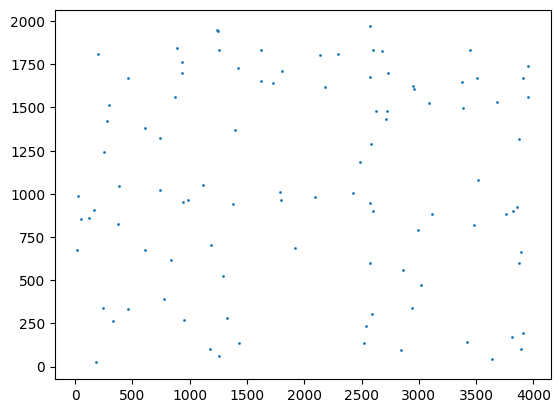

In [14]:
if w_opt_tour:
  best_tour = read_tour("../data/"+file_name+'.opt.tour')
  print(best_tour.shape)
  if readfile:
    plt.plot(cooord[best_tour,0],cooord[best_tour,1], color='grey', lw=5, alpha=0.3)
if readfile:
  plt.scatter(cooord[:,0],cooord[:,1],s=1)
  plt.show()

In [15]:
init_alg = ""
for alg in init_algs:
    # print('==========================================================================')
    init_alg += alg 
    init_alg += ","
if not os.path.exists("temp_result"):
    os.makedirs("temp_result")
command = f"./tsp -n {n} -file_name {file_name} -N {N} -M {M} -r {r} -two_opt_rate {two_opt_rate} -init_alg {init_alg} -BSTTL {besth} -report_period {report_period} -action GA"
# go run tsp.go -n 18512 -file_name d18512 -N 100 -M 1000000 -r 0.01 -T 10 -init_alg MNN -report_period 100000 -action GA
print(command)

os.system(command)

./tsp -n 100 -file_name kroA100 -N 100 -M 1000000 -r 0.01 -two_opt_rate 0 -init_alg NN,MNN,RNN,MRNN, -BSTTL 21282 -report_period 1000000 -action GA
Start, n= 100 file_name= kroA100
Population = 100
Number of generation = 1000000
Mutation rate = 0.01
2-opt rate = 0
T = 50
Init algorithm = NN,MNN,RNN,MRNN, [NN MNN RNN MRNN ]
Report period = 1000000
Action = GA
Best known tour length 21346
NN
best solution after init 25525
idx 0 - count evol 0 0 0 0  - best_h 25525 - elapsed time 6.666µs
elapsed time 518.213833ms
count evol 0 %/ 0 %/ 0
best solution after ga 21346
MNN
best solution after init 24606
idx 0 - count evol 0 0 0 0  - best_h 24606 - elapsed time 4.333µs
elapsed time 446.461916ms
count evol 0 %/ 0 %/ 0
best solution after ga 21343
RNN
best solution after init 24680
idx 0 - count evol 0 0 0 0  - best_h 24680 - elapsed time 5.75µs
elapsed time 443.964375ms
count evol 0 %/ 0 %/ 0
best solution after ga 21346
MRNN
best solution after init 23934
idx 0 - count evol 0 0 0 0  - best_h 23

0

BF mean 27201.06 std 2.8715297705120695
AF mean 57032.86 std 59.801157530013384
[21346.0, 21373.0, 21414.0, 21470.0, 21523.0, 21552.0, 21585.0, 21589.0, 21589.0, 21601.0, 21687.0, 21791.0, 21915.0, 21950.0, 22270.0, 22370.0, 22526.0, 22714.0, 22971.0, 23002.0, 23060.0, 23136.0, 23851.0, 23903.0, 24208.0, 25388.0, 25865.0, 26398.0, 27912.0, 28052.0, 28892.0, 29096.0, 29525.0, 29602.0, 32180.0, 33151.0, 33638.0, 35781.0, 37245.0, 37555.0, 38706.0, 38710.0, 39870.0, 40021.0, 40634.0, 41568.0, 42493.0, 42910.0, 43689.0, 44673.0, 48339.0, 50021.0, 51482.0, 51842.0, 52501.0, 53218.0, 55769.0, 57147.0, 58621.0, 60355.0, 60651.0, 61736.0, 62787.0, 65016.0, 67163.0, 70764.0, 71467.0, 71770.0, 71900.0, 74640.0, 74755.0, 77816.0, 81564.0, 82844.0, 83128.0, 85423.0, 85548.0, 87033.0, 87946.0, 88045.0, 89400.0, 89867.0, 94053.0, 94767.0, 96330.0, 97393.0, 97912.0, 99495.0, 104936.0, 104962.0, 112244.0, 112502.0, 112966.0, 118842.0, 120123.0, 122787.0, 130318.0, 133003.0, 144721.0, 145424.0]


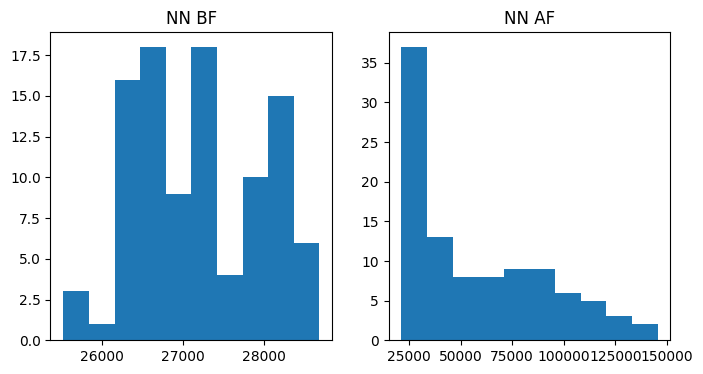

BF mean 27992.92 std 5.112298804513052
AF mean 64018.74 std 59.69087905884429
[21343.0, 21381.0, 21384.0, 21443.0, 21547.0, 21597.0, 21856.0, 21894.0, 21945.0, 22005.0, 22065.0, 22217.0, 22454.0, 22649.0, 22714.0, 23123.0, 23692.0, 24201.0, 24232.0, 24701.0, 25303.0, 26063.0, 27053.0, 27348.0, 27456.0, 29228.0, 29446.0, 29698.0, 30702.0, 32182.0, 32420.0, 33587.0, 34329.0, 35630.0, 38020.0, 38177.0, 38462.0, 41081.0, 41413.0, 43807.0, 44616.0, 45501.0, 46280.0, 47537.0, 49093.0, 49141.0, 49347.0, 51393.0, 51582.0, 53285.0, 58002.0, 58167.0, 58521.0, 59760.0, 60519.0, 61856.0, 62258.0, 63040.0, 65588.0, 67418.0, 67523.0, 73610.0, 75674.0, 76364.0, 77703.0, 78601.0, 78824.0, 79366.0, 79455.0, 80037.0, 85069.0, 85500.0, 94185.0, 94357.0, 96191.0, 97074.0, 97240.0, 98579.0, 99303.0, 99359.0, 102135.0, 102891.0, 104078.0, 106405.0, 107051.0, 107939.0, 110912.0, 112550.0, 118629.0, 120534.0, 125656.0, 129968.0, 131381.0, 132188.0, 132569.0, 132985.0, 133411.0, 135950.0, 157485.0, 170391.0]


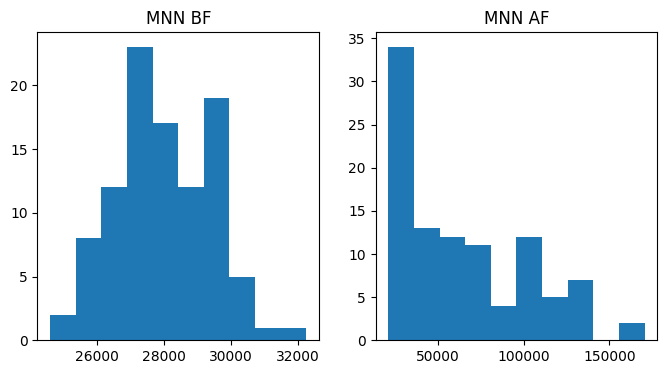

BF mean 26690.09 std 4.0332924607304745
AF mean 57851.66 std 57.76985794246415
[21346.0, 21507.0, 21592.0, 21641.0, 21644.0, 21739.0, 21807.0, 21840.0, 21930.0, 21952.0, 21970.0, 22433.0, 22799.0, 22871.0, 22887.0, 22914.0, 22958.0, 23573.0, 24037.0, 24792.0, 25067.0, 26420.0, 27190.0, 27887.0, 29036.0, 29567.0, 30114.0, 30751.0, 31339.0, 32208.0, 33348.0, 33466.0, 33895.0, 34246.0, 34710.0, 34958.0, 35372.0, 35928.0, 36488.0, 36977.0, 37359.0, 37816.0, 39743.0, 40874.0, 44547.0, 45670.0, 47489.0, 48372.0, 48863.0, 49108.0, 49216.0, 49667.0, 53751.0, 53895.0, 54742.0, 55971.0, 56654.0, 57516.0, 60752.0, 62555.0, 62628.0, 63971.0, 64361.0, 64761.0, 64813.0, 68359.0, 68978.0, 69913.0, 71441.0, 72047.0, 72904.0, 74519.0, 74830.0, 75057.0, 76670.0, 78388.0, 78762.0, 87204.0, 88385.0, 88546.0, 89799.0, 89909.0, 91278.0, 92590.0, 98335.0, 99413.0, 103157.0, 105226.0, 106796.0, 108013.0, 110502.0, 111495.0, 112248.0, 114642.0, 117707.0, 118773.0, 126162.0, 145179.0, 146617.0, 149029.0]


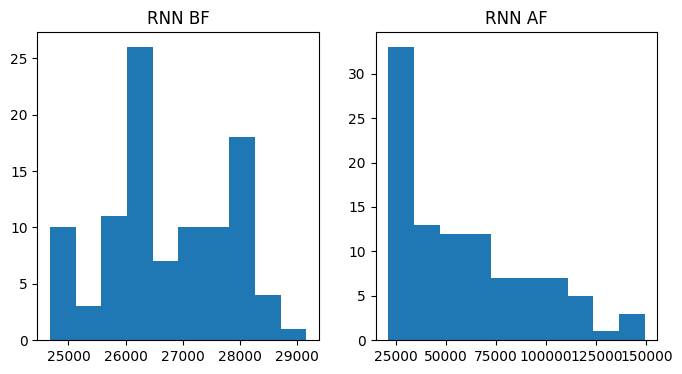

BF mean 27063.84 std 5.9712791509462955
AF mean 65160.08 std 55.542221677679706
[21305.0, 21430.0, 21445.0, 21469.0, 21514.0, 21687.0, 21706.0, 21749.0, 21968.0, 22342.0, 22639.0, 22722.0, 23108.0, 23483.0, 23570.0, 23795.0, 24345.0, 24585.0, 25898.0, 27260.0, 28734.0, 29750.0, 29990.0, 30512.0, 31109.0, 31583.0, 31900.0, 32669.0, 34282.0, 36270.0, 36701.0, 37523.0, 38376.0, 39845.0, 40685.0, 41151.0, 42340.0, 44150.0, 47472.0, 47511.0, 49145.0, 49180.0, 49260.0, 49325.0, 49451.0, 50534.0, 50908.0, 52145.0, 55108.0, 55626.0, 59184.0, 61509.0, 62240.0, 63757.0, 64005.0, 66247.0, 70540.0, 70694.0, 74227.0, 74886.0, 75445.0, 76335.0, 76530.0, 76533.0, 76594.0, 81305.0, 81576.0, 81814.0, 82081.0, 83597.0, 84336.0, 86241.0, 88379.0, 93459.0, 93585.0, 94910.0, 95746.0, 96671.0, 97304.0, 100443.0, 100820.0, 102372.0, 106825.0, 109653.0, 111508.0, 114761.0, 115066.0, 117451.0, 119242.0, 120062.0, 121995.0, 122321.0, 124965.0, 125219.0, 126183.0, 128951.0, 130079.0, 137089.0, 139444.0, 150574.0

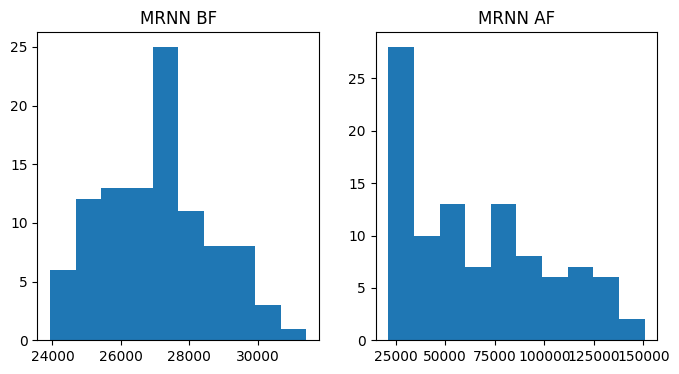

In [16]:
for alg in init_algs:
    BF = read_population_h("temp_result/"+alg+ "_population_after_init")
    AF = read_population_h("temp_result/"+alg+ "_population_after_ga")
    print('BF mean', np.mean(BF), 'std', 100*np.std(BF)/np.mean(BF))
    print('AF mean', np.mean(AF), 'std', 100*np.std(AF)/np.mean(AF))
    # print(sorted(BF))
    print('=======================================')
    print(sorted(AF))
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    plt.title(f'{alg} BF')
    plt.hist(BF)
    plt.subplot(1, 2, 2)
    plt.title(f'{alg} AF')
    plt.hist(AF)
    plt.show()

In [17]:
histories, tours = read_result_ga()

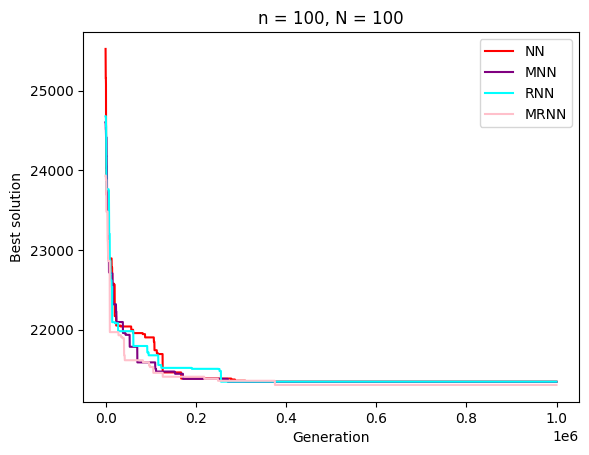

In [18]:
plot_histories(histories=histories, colors=colors, w_opt=False)

In [19]:
# plot_histories(histories=histories, colors=colors, w_opt=False)

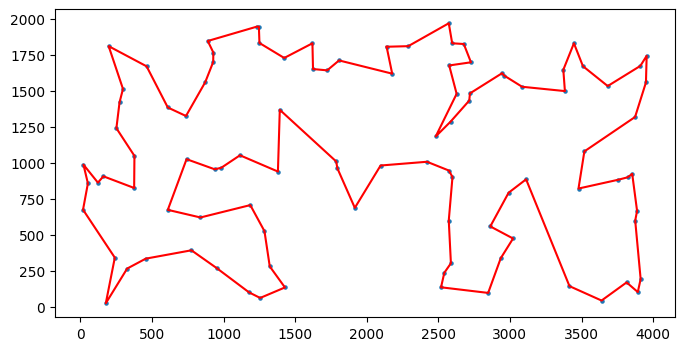

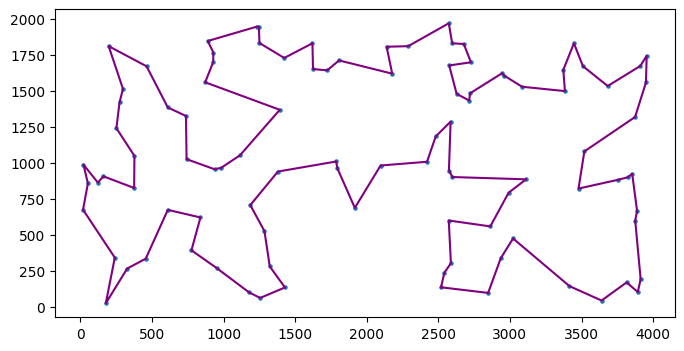

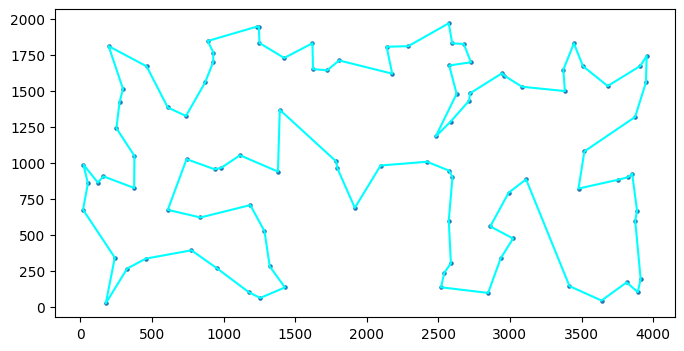

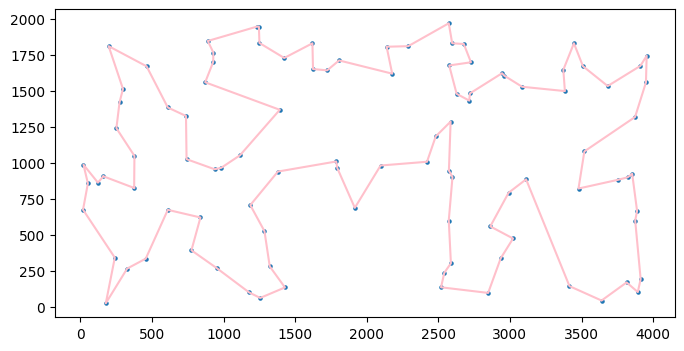

In [20]:
if readfile:
    for i in range(len(init_algs)):
        plot_tour(tours[i],colors[i], figsize=(8,4))

In [22]:

# x = np.arange(n*n)
for alg in init_algs:
    fpops = read_result_test_init("temp_result/"+alg+"_init_edge_count")
    n_zeros1 = np.count_nonzero(fpops)
    bests = read_result_test_init("temp_result/"+alg+"_final_edge_count")
    n_zeros2 = np.count_nonzero(bests)
    print('init',alg, n_zeros1,'/', n*(n-1), '-', np.round(n_zeros1*100/(n*(n-1)),3), '%', 'final',alg, n_zeros2,'/', n*(n-1), '-', np.round(n_zeros2*100/(n*(n-1)),3), '%')
    print()
    # plt.title(f'{alg} edge count')
    # plt.bar(x,bests)
    # plt.show()

init NN 358 / 9900 - 3.616 % final NN 2706 / 9900 - 27.333 %

init MNN 1131 / 9900 - 11.424 % final MNN 3047 / 9900 - 30.778 %

init RNN 351 / 9900 - 3.545 % final RNN 2776 / 9900 - 28.04 %

init MRNN 1059 / 9900 - 10.697 % final MRNN 3147 / 9900 - 31.788 %

